In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columns

## D1: Determine the Summary Statistics for June

In [107]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# I am going to import date time and create two time variables. If I use this method I should be able to write
# a function that accepts dates and I can easily reuse when analysing the December data too

month = 6

def temp_extract(month):
    
    # Extract the desired data
    data = session.query(Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    print(data)

temp_extract(month)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [109]:
# 2. Convert the June temperatures to a list.

# I can continue to modify my function to include a statement to convert the data to a list. 

list_data=[]

def temp_extract(month):
    
    # Extract the desired data
    data = session.query(Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = np.ravel(data)
        
    print(list_data)
temp_extract(6)

[78. 76. 78. ... 74. 76. 75.]


In [112]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 

# Continuing my theme I am going to add another element to my function, convert to a dataframe
import pandas as pd

def temp_extract(month):
    
    # Extract the desired data
    data = session.query(Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = np.ravel(data)
    
    # Convert list to data frame 
    data_df = pd.DataFrame(list_data, columns=['Temps'])
    
    return data_df
    
temp_extract(6)

,Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [115]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.

def temp_extract(month):
    
    # Extract the desired data
    data = session.query(Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = np.ravel(data)
    
    # Convert list to data frame 
    data_df = pd.DataFrame(list_data, columns=['Temps'])
    
    return data_df.describe()
    
temp_extract(6)

,Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

# My summary statistics matched, which means my function is working and I can solve
# deliverable 2 with one line of code!

## D2: Determine the Summary Statistics for December

In [ ]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.


In [ ]:
# 7. Convert the December temperatures to a list.


In [ ]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 


In [116]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

# See the work & documentation completed in Deliverable 1 to see the inner workings of the
# temp_extract function. 

temp_extract(12)


,Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

# Success! My summary results match those of the instructions.

# Creating a unique visual representation of the data

In [ ]:
# First I want to collect the temperature data for each of the months. Avg, min, max, std.
# Then I will create a new df for the new data and create a graph



In [ ]:
month = ['JAN', 'FEB', 'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

temps_df = pd.DataFrame(columns=['month', 'avg','min','max','std'])
temps_df

In [ ]:
temps_df['month'] = month
temps_df['avg'] = averages
temps_df['min'] = mins
temps_df['max'] = maxes
temps_df['std'] = stds

In [ ]:
temps_df.set_index('month', inplace=True)

In [ ]:
temps_df

In [14]:
# now I can create a plot

import matplotlib.pyplot as plt

high_std = temps_df['avg']+temps_df['std']
low_std = temps_df['avg']-temps_df['std']

plt.plot(temps_df['avg'], 'o')
plt.plot(temps_df['min'], 'ro')
plt.plot(temps_df['max'], 'go')
plt.plot(high_std, 'bx')
plt.plot(low_std, 'x')


NameError: name 'temps_df' is not defined

In [ ]:
# I realize I can do this in a simpler manner. 

# Still need to alter the existing function



def temp_extract(month):
    
    # Extract the desired data
    data = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = list(data)
    
    # Convert list to data frame 
    data_df = pd.DataFrame(list_data, columns=['Date', 'Temps'])
    
    # Print Summary Statistics
    return data_df['Temps']

dfs = []

for i in range(1,13):
    dfs.append(temp_extract(i))

dfs[11]

In [ ]:

whole_df = pd.DataFrame(dfs, columns=['Date', 'Temps'])


In [ ]:
# for i from 1 to 13
    # box plot(months[i], temps_extract)
    # show plot

In [ ]:
# Lets figure out how to make one box plot first and then I will iterate the system

def temp_extract(month):
    
    # Extract the desired data
    data = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = list(data)
    
    # Convert list to data frame 
    data_df = pd.DataFrame({'temps': list_data})
    #data_df['temps'] = data_df['temps'].astype('int64')
    #ax = data_df.boxplot(data_df['temps'])
    
    # Print Summary Statistics
    return data_df

temp_extract(1)

<AxesSubplot:>

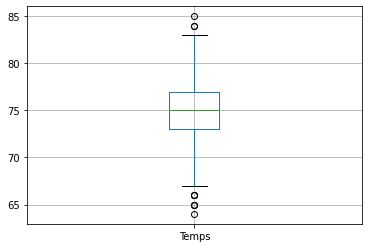

In [25]:
import matplotlib.pyplot as plt

def temp_box_plot(month):
    
    # Extract the desired data
    data = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = list(data)
    
    # Convert list to data frame 
    data_df = pd.DataFrame(list_data, columns=['Date', 'Temps'])
    ax = data_df.boxplot()
    
    return ax
    
temp_box_plot(6)

<AxesSubplot:>

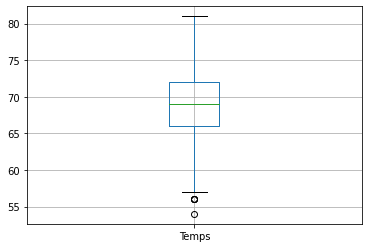

In [26]:
temp_box_plot(1)

(<AxesSubplot:>,)

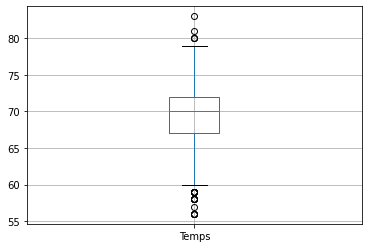

In [28]:
temp_box_plot(2), #temp_box_plot(3)

In [29]:
month_list=[1,2,3,4,5,6,7,8,9,10,11,12]

def temp_box_plot_all(month):
    
    # Extract the desired data
    data = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== month).all()

    # Convert the data format to a list
    list_data = list(data)
    
    # Convert list to data frame 
    data_df = pd.DataFrame(list_data, columns=['Date', 'Temps'])
    ax = data_df.boxplot()
    
    return ax

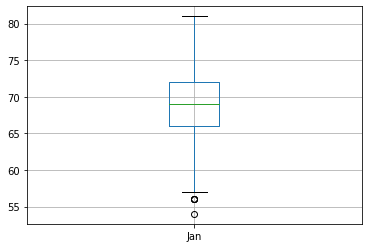

In [45]:
# Extract the desired data
data1 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 1).all()

    # Convert the data format to a list
list_data1 = list(data1)
    
    # Convert list to data frame 
data_df_1 = pd.DataFrame(list_data1, columns=['Date', 'Jan'])
ax1 = data_df_1.boxplot()


<AxesSubplot:>

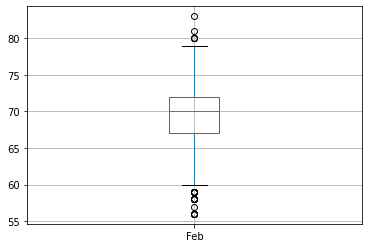

In [58]:
data2 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 2).all()

    # Convert the data format to a list
list_data2 = list(data2)
    
    # Convert list to data frame 
data_df_2 = pd.DataFrame(list_data2, columns=['Date', 'Feb'])
data_df_2.head()
data_df_2.head()
data_df_2.boxplot()

In [57]:
# march
data3 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 3).all()
list_data3 = list(data3)
data_df_3 = pd.DataFrame(list_data3, columns=['Date', 'March'])

# april
data4 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 4).all()
list_data4 = list(data4)
data_df_4 = pd.DataFrame(list_data4, columns=['Date', 'April'])

# may
data5 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 5).all()
list_data5 = list(data5)
data_df_5 = pd.DataFrame(list_data5, columns=['Date', 'May'])

#june
data6 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 6).all()
list_data6 = list(data6)
data_df_6 = pd.DataFrame(list_data6, columns=['Date', 'June'])

#july
data7 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 7).all()
list_data7 = list(data7)
data_df_7 = pd.DataFrame(list_data7, columns=['Date', 'July'])

#aug
data8 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 8).all()
list_data8 = list(data8)
data_df_8 = pd.DataFrame(list_data8, columns=['Date', 'August'])

#sep
data9 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 9).all()
list_data9 = list(data9)
data_df_9 = pd.DataFrame(list_data9, columns=['Date', 'September'])

#oct
data10 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 10).all()
list_data10 = list(data10)
data_df_10 = pd.DataFrame(list_data10, columns=['Date', 'October'])

#nov
data11 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 11).all()
list_data11 = list(data11)
data_df_11 = pd.DataFrame(list_data11, columns=['Date', 'November'])

#dec
data12 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)== 12).all()
list_data12 = list(data12)
data_df_12 = pd.DataFrame(list_data12, columns=['Date', 'December'])

In [69]:
data_df_1['February'] = data_df_2['Feb']
data_df_1['March'] = data_df_3['March']
data_df_1['April']= data_df_4['April']
data_df_1['May']= data_df_5['May']
data_df_1['June']=data_df_6['June']
data_df_1['July']= data_df_7['July']
data_df_1['August']= data_df_8['August']
data_df_1['September']= data_df_9['September']
data_df_1['October']= data_df_10['October']
data_df_1['November']= data_df_11['November']
data_df_1['December']= data_df_12['December']
#data_df_1 = data_df_1.drop('Date', axis=1)
data_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Jan        1727 non-null   float64
 1   February   1610 non-null   float64
 2   March      1693 non-null   float64
 3   April      1713 non-null   float64
 4   May        1727 non-null   float64
 5   June       1700 non-null   float64
 6   July       1711 non-null   float64
 7   August     1622 non-null   float64
 8   September  1480 non-null   float64
 9   October    1556 non-null   float64
 10  November   1488 non-null   float64
 11  December   1517 non-null   float64
dtypes: float64(12)
memory usage: 162.0 KB


Text(0, 0.5, 'Temperatures')

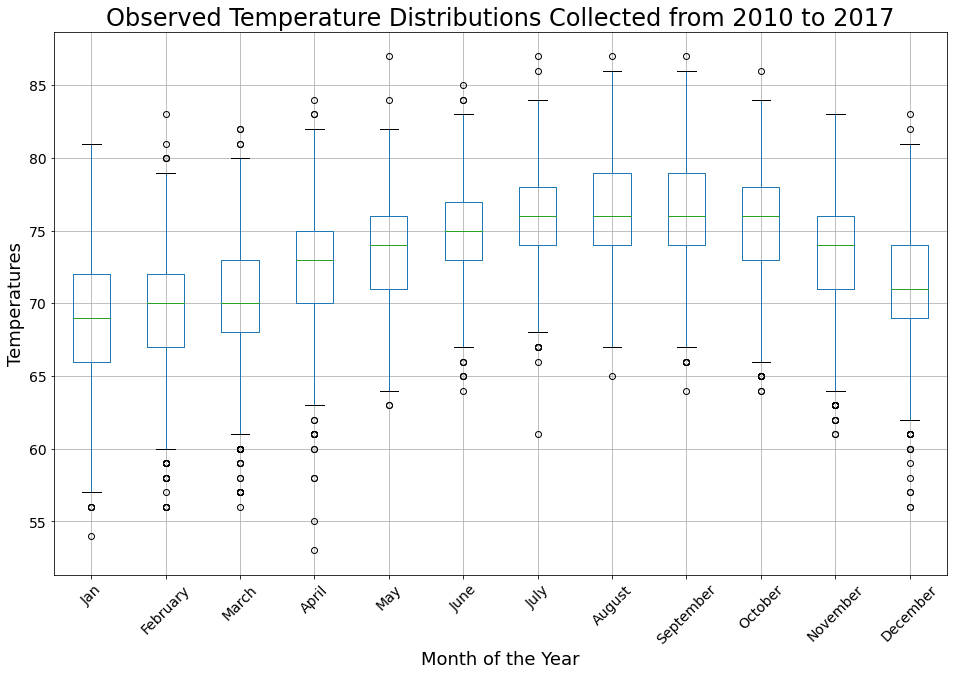

In [99]:
data_df_1.boxplot(figsize=(16,10), rot=45, fontsize=14)

plt.title('Observed Temperature Distributions Collected from 2010 to 2017',fontsize=24)
plt.xlabel('Month of the Year', fontsize=18)
plt.ylabel('Temperatures', fontsize = 18)


In [100]:
data_df_1.head()

,Jan,February,March,April,May,June,July,August,September,October,November,December
0,65.0,66.0,70.0,74.0,77.0,78.0,75.0,77.0,77.0,78.0,75.0,76.0
1,63.0,67.0,72.0,74.0,73.0,76.0,77.0,76.0,76.0,78.0,73.0,74.0
2,74.0,69.0,73.0,74.0,74.0,78.0,77.0,77.0,78.0,78.0,73.0,74.0
3,76.0,67.0,70.0,71.0,76.0,76.0,78.0,77.0,77.0,78.0,77.0,64.0
4,73.0,67.0,71.0,72.0,76.0,77.0,78.0,75.0,77.0,80.0,76.0,64.0


In [85]:
data_df_1['December'].mean()

71.04152933421226